<a href="https://colab.research.google.com/github/estoilkov/Coursera_Capstone/blob/master/Capstone_Coursera_Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Capstone Project - Part 1  </center> 

###  Introduction/Business Problem
 
<p>
This project will try to compare a group of some of the best known world cities that are considered to be the most promissing tech hubs of the future.The choice of category of cities is not so important for the methodology, but this may help in identifying stronger relations when working with a relatively homogenous group. Experiments with other groups will indeed help find the best approach.</p>
 
<p>The comparision will run across several completely different datasets of features for all of the cities chosen and will try to identify if the different feature sets may lead to similar cities clusters. K-means will be used to analyse data.</p>
 
<p>This approach may be of interest for a number of reasons. On the one side we may discover that somehow a group of features correlates with a completely different other group of features if  final city clusters overlap. On the other side we may use this approach for feature selection to use later with supervised machine learning.</p>
 
<p>If we discover a strong relation between the two groups of features we may analyse other possible practical applications when comparing cities within a cluster. For example, if we identify typical features within some clusters, business opportunities may become obvious in cities with strong outliers as compared to other cities of the same cluster. </p>
 


### Data for the analysis
 
#### Citites for the analysis: 
<p>New York, London, 
Beijing, Boston, Tel Aviv, Los Angeles, Shanghai, Paris, Berlin, Stockholm, Seattle, Toronto-Waterloo, Singapore, Amsterdam, Austin, Chicago, Bangalore, Washington, San Diego, Lausanne, Bern, Geneva, Sydney, Vancouver, Hong Kong, Atlanta, Barcelona, Dublin,Miami, Munich </p>
<p>
The first group of features will come fron Foursquare API data run for all of the cities. <br/>
We will try to identify the best second group of features with a trial and error approach. A large initial selection of features will be used including general population, economy, development statistics,, as well s some indicators related to innovation and startup  culture.
</p>
 
<ul>Data used
<li>City density</li>
<li>GDP per capita</li>
<li>Employment</li>
<li>Environment</li>
<li>Transportation</li>
<li>Education</li>
<li>Health</li>
<li>Best cities ranking</li>
<li>Cost of living statistics</li>
<li>Various indices around ecosystems performance,  funding,  market reach, connectedness,...</li>
 
</ul>
 
<p>Final data chosen will depend on availability for all cities analysed.</p>
 
<p>Data sources are NYC Global Partners, Startup Genome, OECD, UBS, EIU, AT Kearney, ... and indeed Foursquare.</p>



<p> Below is an example of data used for tech hub cities is
Global Startup Ecosystem Report 2019 by Startup Genome </p>

### Quantitative Analysis

In [0]:
import pandas as pd
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#### Let`s preprocess the first dataset for our analysis, consisting of general stats on population, economy, health, employment, and second set of indicators on innovation that were already concatenated for easier preprocessing. We will analyse the features as separate datasets and in various combinations.

In [2]:
cities = pd.read_excel('fin_city.xlsx')
#cities = cities.drop(columns=['ranking'])
cities

,City,Foreign Born,Annual Population Growth,Primary Industry,Share of Global 500 Companies (%),Poverty Rate,Mass Transit Commuters,Percent of Population with Higher Education (%),Foreign Tourists Annually (millions),Domestic Tourists Annually (millions),"Infant Mortality (Deaths per 1,000 Births)",Life Expectancy in Years (Male),Life Expectancy in Years (Female),"Physicians per 100,000 People",Anti-Smoking Legislation,Air Quality*,Retrofitted City Vehicle Fleet,Bike Share Program,ranking,change,performance,funding,marketReach,connectedness,talent,experience,k0wledge,growthIndex
0,New York,0.3600,1.000,Professional Services,3.6,19.40,80.00,33.70,10.60,40.30,4.70,78.10,83.30,393.00,1,21,1,1,2,0,1,1,3,2,2,1,2,6
1,London,0.3700,0.850,Real Estate & Rental & Leasing,3.2,16.00,49.90,31.00,15.20,11.10,4.60,79.00,83.30,NaN,1,29,1,1,3,0,1,1,1,1,2,2,1,6
2,Beijing,0.0046,3.800,Wholesale & Retail,8.2,0.84,NaN,0.05,4.90,180.00,3.29,79.00,83.00,355.00,1,121,0,0,4,1,1,1,5,5,1,1,1,4
3,Boston,0.2700,1.000,"Professional, Scientific and Technical Services",0.2,16.90,31.70,24.50,1.14,18.16,5.80,74.80,81.10,NaN,1,17,1,0,5,0,1,2,2,3,1,1,2,7
4,Los Angeles,0.3100,0.850,Real Estate & Rental & Leasing,3.2,16.00,49.90,42.00,15.20,11.10,4.60,79.00,83.30,NaN,1,23,1,1,7,3,1,1,3,4,3,2,3,5
5,Shanghai,0.0082,1.720,Finance and Insurance,1.0,2.43,NaN,21.89,6.29,123.61,2.89,79.42,84.06,270.00,1,81,0,1,8,0,2,2,2,4,1,3,1,6
6,Paris,0.1400,0.800,Professional Services,5.0,NaN,NaN,41.60,8.37,6.66,4.00,80.00,86.00,NaN,1,38,1,1,9,2,2,1,3,2,3,3,2,8
7,Berlin,0.1410,0.320,"Finance, Rental & Leasing",0.2,NaN,NaN,14.80,2.88,5.38,3.90,82.00,88.00,176.00,1,26,0,1,10,-3,3,2,1,1,2,3,4,6
8,Stockholm,0.2920,0.470,Financial Operations,0.8,NaN,43.00,NaN,NaN,NaN,2.38,78.00,82.00,367.00,1,28,1,1,11,3,3,2,2,2,4,2,2,7
9,Toronto,0.4570,1.207,Business Services,1.4,20.60,56.00,35.80,4.20,21.90,NaN,NaN,NaN,NaN,1,21,1,1,13,3,3,2,1,3,4,4,3,5


####Let`s see what columns/features we start with:

In [3]:
cities.columns

Index(['City', 'Foreign Born', 'Annual Population Growth', 'Primary Industry',
       'Share of Global 500 Companies (%)', 'Poverty Rate',
       'Mass Transit Commuters',
       'Percent of Population with Higher Education (%)',
       'Foreign Tourists Annually (millions)',
       'Domestic Tourists Annually (millions)',
       'Infant Mortality (Deaths per 1,000 Births)',
       'Life Expectancy in Years (Male)', 'Life Expectancy in Years (Female)',
       'Physicians per 100,000 People', 'Anti-Smoking Legislation',
       'Air Quality*', 'Retrofitted City Vehicle Fleet', 'Bike Share Program',
       'ranking', 'change', 'performance', 'funding', 'marketReach',
       'connectedness', 'talent', 'experience', 'k0wledge', 'growthIndex'],
      dtype='object')

#### Rename the columns for easier manipulation:

In [4]:
cities.columns = ['city', 'foborn', 'anpopgrowth', 'primind','share500', 'povrate','masstransit','higher_educ','fo_tourists','dom_tourists',
              'inf_mortality','life_exp_m', 'life_exp_f','physicians', 'anti_smoking','air_quality', 'retrofitted_city_vehic', 
              'bike_share', 'ranking', 'change', 'performance', 'funding', 'marketReach','connectedness', 'talent', 'experience', 'k0wledge', 'growthIndex']

cities.head()

,city,foborn,anpopgrowth,primind,share500,povrate,masstransit,higher_educ,fo_tourists,dom_tourists,inf_mortality,life_exp_m,life_exp_f,physicians,anti_smoking,air_quality,retrofitted_city_vehic,bike_share,ranking,change,performance,funding,marketReach,connectedness,talent,experience,k0wledge,growthIndex
0,New York,0.3600,1.00,Professional Services,3.6,19.40,80.0,33.70,10.60,40.30,4.70,78.1,83.3,393.0,1,21,1,1,2,0,1,1,3,2,2,1,2,6
1,London,0.3700,0.85,Real Estate & Rental & Leasing,3.2,16.00,49.9,31.00,15.20,11.10,4.60,79.0,83.3,NaN,1,29,1,1,3,0,1,1,1,1,2,2,1,6
2,Beijing,0.0046,3.80,Wholesale & Retail,8.2,0.84,NaN,0.05,4.90,180.00,3.29,79.0,83.0,355.0,1,121,0,0,4,1,1,1,5,5,1,1,1,4
3,Boston,0.2700,1.00,"Professional, Scientific and Technical Services",0.2,16.90,31.7,24.50,1.14,18.16,5.80,74.8,81.1,NaN,1,17,1,0,5,0,1,2,2,3,1,1,2,7
4,Los Angeles,0.3100,0.85,Real Estate & Rental & Leasing,3.2,16.00,49.9,42.00,15.20,11.10,4.60,79.0,83.3,NaN,1,23,1,1,7,3,1,1,3,4,3,2,3,5


#### We see some NaNs. Let`s use Iterative Imputer to Impute Missing Values.
<p> In the IterativeImputer strategy, a machine learning model is built to estimate the missing values. Each feature having missing values is taken as a function of other features. This is done in a round-robin fashion.

In simple words, a feature having missing value is “y” or the dependent variable and other feature columns become “X” or independent variables.</p>

In [0]:
new_cols = cities.drop(['city','primind'],1).columns

In [0]:
import numpy as np

# This estimator is experimental, we need to import it explicitly
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

# Impute missing values using iterative imputer
iter_imp = IterativeImputer(random_state= 34)
cities_2 = iter_imp.fit_transform(cities.drop(['city','primind'],1))
cities_2 = pd.DataFrame(cities_2, columns = new_cols)

In [7]:
# Let`s add back the two dropped columns and inthe original order
cities_2['city'] = cities['city']
cities_2['primind'] = cities['primind']
cities_2 = cities_2[cities.columns]
print(cities_2.shape, cities.shape)
cities_2.head()

(19, 28) (19, 28)


,city,foborn,anpopgrowth,primind,share500,povrate,masstransit,higher_educ,fo_tourists,dom_tourists,inf_mortality,life_exp_m,life_exp_f,physicians,anti_smoking,air_quality,retrofitted_city_vehic,bike_share,ranking,change,performance,funding,marketReach,connectedness,talent,experience,k0wledge,growthIndex
0,New York,0.3600,1.00,Professional Services,3.6,19.40,80.00000,33.70,10.60,40.30,4.70,78.1,83.3,393.000000,1.0,21.0,1.0,1.0,2.0,0.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,6.0
1,London,0.3700,0.85,Real Estate & Rental & Leasing,3.2,16.00,49.90000,31.00,15.20,11.10,4.60,79.0,83.3,251.079236,1.0,29.0,1.0,1.0,3.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,6.0
2,Beijing,0.0046,3.80,Wholesale & Retail,8.2,0.84,265.63085,0.05,4.90,180.00,3.29,79.0,83.0,355.000000,1.0,121.0,0.0,0.0,4.0,1.0,1.0,1.0,5.0,5.0,1.0,1.0,1.0,4.0
3,Boston,0.2700,1.00,"Professional, Scientific and Technical Services",0.2,16.90,31.70000,24.50,1.14,18.16,5.80,74.8,81.1,250.715386,1.0,17.0,1.0,0.0,5.0,0.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0,7.0
4,Los Angeles,0.3100,0.85,Real Estate & Rental & Leasing,3.2,16.00,49.90000,42.00,15.20,11.10,4.60,79.0,83.3,251.036952,1.0,23.0,1.0,1.0,7.0,3.0,1.0,1.0,3.0,4.0,3.0,2.0,3.0,5.0


#### Let`s apply one-hot encoding and Standard scaling to categorical and numeric columns respectively

In [8]:
print(cities_2.columns)
col_transf = ['foborn', 'anpopgrowth', 'share500', 'povrate', 'masstransit', 'higher_educ', 'fo_tourists',
       'dom_tourists', 'inf_mortality', 'life_exp_m', 'life_exp_f', 'physicians','anti_smoking', 'air_quality', 'retrofitted_city_vehic', 'bike_share',
       'ranking', 'change', 'performance', 'funding', 'marketReach', 'connectedness', 'talent', 'experience', 'k0wledge', 'growthIndex'] +list(set(cities_2.primind))
print(col_transf)

Index(['city', 'foborn', 'anpopgrowth', 'primind', 'share500', 'povrate',
       'masstransit', 'higher_educ', 'fo_tourists', 'dom_tourists',
       'inf_mortality', 'life_exp_m', 'life_exp_f', 'physicians',
       'anti_smoking', 'air_quality', 'retrofitted_city_vehic', 'bike_share',
       'ranking', 'change', 'performance', 'funding', 'marketReach',
       'connectedness', 'talent', 'experience', 'k0wledge', 'growthIndex'],
      dtype='object')
['foborn', 'anpopgrowth', 'share500', 'povrate', 'masstransit', 'higher_educ', 'fo_tourists', 'dom_tourists', 'inf_mortality', 'life_exp_m', 'life_exp_f', 'physicians', 'anti_smoking', 'air_quality', 'retrofitted_city_vehic', 'bike_share', 'ranking', 'change', 'performance', 'funding', 'marketReach', 'connectedness', 'talent', 'experience', 'k0wledge', 'growthIndex', 'Wholesale & Retail', 'Wholesale/Retail Trade', 'Real Estate & Rental & Leasing', 'Wholesale', 'Services', 'Research and Advising', 'Professional Services', 'Finance and Insuran

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

transformers = [("num", StandardScaler(), ['foborn', 'anpopgrowth', 'share500', 'povrate', 'masstransit', 'higher_educ', 'fo_tourists',
       'dom_tourists', 'inf_mortality', 'life_exp_m', 'life_exp_f', 'physicians','anti_smoking', 'air_quality', 'retrofitted_city_vehic', 'bike_share',
       'ranking', 'change', 'performance', 'funding', 'marketReach', 'connectedness', 'talent', 'experience', 'k0wledge', 'growthIndex']), 
       ("cat", OneHotEncoder(handle_unknown='ignore'), ['primind'])]
transformer = ColumnTransformer(transformers = transformers)
trans_city = transformer.fit_transform(cities_2)
trans_city = pd.DataFrame(trans_city, columns = col_transf)


In [10]:
# Add back the 'city' columns
trans_city = pd.concat([cities_2.city, trans_city], axis=1)
print(trans_city.shape)
trans_city.head()

(19, 41)


,city,foborn,anpopgrowth,share500,povrate,masstransit,higher_educ,fo_tourists,dom_tourists,inf_mortality,life_exp_m,life_exp_f,physicians,anti_smoking,air_quality,retrofitted_city_vehic,bike_share,ranking,change,performance,funding,marketReach,connectedness,talent,experience,k0wledge,growthIndex,Wholesale & Retail,Wholesale/Retail Trade,Real Estate & Rental & Leasing,Wholesale,Services,Research and Advising,Professional Services,Finance and Insurance,"Professional, Scientific and Technical Services",Business Services,Financial Operations,"Finance, Rental & Leasing",Manufacturing,Trading and Logistics/Finances
0,New York,0.758267,-0.326949,0.938636,0.846124,0.277624,0.520442,0.496584,0.297078,0.112506,-0.025036,0.004595,1.639946,0.0,-0.463117,0.763763,0.516398,-1.468958,0.051510,-1.215838,-1.201789,0.035007,-0.624695,-0.805313,-1.600781,-0.735215,-0.042640,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,London,0.824363,-0.426853,0.745371,0.296410,-0.215090,0.247258,1.247178,-0.352879,0.059682,0.354936,0.004595,-0.007475,0.0,-0.153012,0.763763,0.516398,-1.345461,0.051510,-1.215838,-1.201789,-1.295259,-1.366520,-0.805313,-0.858956,-1.433669,-0.042640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Beijing,-1.590793,1.537924,3.161185,-2.154668,3.316260,-2.884245,-0.433501,3.406630,-0.632307,0.354936,-0.131548,1.198841,0.0,3.413191,-1.309307,-1.936492,-1.221965,0.377742,-1.215838,-1.201789,1.365273,1.600781,-1.533930,-1.600781,-1.433669,-1.662966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Boston,0.163401,-0.326949,-0.704118,0.441922,-0.513010,-0.410408,-1.047031,-0.195732,0.693566,-1.418267,-0.993784,-0.011698,0.0,-0.618169,0.763763,-1.936492,-1.098468,0.051510,-1.215838,-0.509850,-0.630126,0.117130,-1.533930,-1.600781,-0.735215,0.767523,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Los Angeles,0.427786,-0.426853,0.745371,0.296410,-0.215090,1.360231,1.247178,-0.352879,0.059682,0.354936,0.004595,-0.007966,0.0,-0.385591,0.763763,0.516398,-0.851476,1.030204,-1.215838,-1.201789,0.035007,0.858956,-0.076696,-0.858956,-0.036761,-0.852803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Getting the proper location for analysis with Foursquare is very tricky in this case as in most cases the cities in the data pool are sizable and their geographic spread often dont overlap with the localisation of technology companies, but we can easily assume that there is more than direct connection between the two. Indeed a separate analysis can be done over the impact of stratup and innovation culture on the whole city.

<p>Data gathering, selection and manipulation is a huge topic which will be left apart for this analysis, which focusses on alhgorithms application.</p>

#### Online search for get city centers coodranates did not result in satisfactory results so a manual google maps research for 19 cities was performed.

####Let`s download  cities coordinates

In [11]:
citimap = pd.read_csv('citimap.csv')
citimap.head()

,Unnamed: 0,city,Latitude,Longitude
0,0,New York,40.840573,-73.919379
1,1,London,51.516689,-0.124093
2,2,Beijing,39.938734,116.426407
3,3,Boston,42.337555,-71.050128
4,4,Los Angeles,34.072787,-118.281653


####Let`s merge all the data so far.

In [12]:
#citimerged = trans_city.join(citimap.set_index('city'), on='city')
citimerged = pd.concat([trans_city, citimap[['Latitude', 'Longitude']]], axis=1)
print(citimap.shape, citimerged.shape)
citimerged.tail()

(19, 4) (19, 43)


,city,foborn,anpopgrowth,share500,povrate,masstransit,higher_educ,fo_tourists,dom_tourists,inf_mortality,life_exp_m,life_exp_f,physicians,anti_smoking,air_quality,retrofitted_city_vehic,bike_share,ranking,change,performance,funding,marketReach,connectedness,talent,experience,k0wledge,growthIndex,Wholesale & Retail,Wholesale/Retail Trade,Real Estate & Rental & Leasing,Wholesale,Services,Research and Advising,Professional Services,Finance and Insurance,"Professional, Scientific and Technical Services",Business Services,Financial Operations,"Finance, Rental & Leasing",Manufacturing,Trading and Logistics/Finances,Latitude,Longitude
14,Sydney,0.593026,0.072667,-0.510853,0.384657,-0.639053,0.864452,-0.825116,-0.453044,1.274626,0.354936,-0.131548,1.523866,0.0,-0.811985,0.763763,0.516398,1.124468,-1.905878,1.501917,1.565968,1.365273,-0.624695,0.651920,1.366520,1.360147,0.767523,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.894675,151.199730
15,Vancouver,1.492596,-0.193743,-0.422672,-0.980867,-0.621047,-0.395232,-0.417184,-0.530949,-0.257260,0.354936,-0.131548,-0.368244,0.0,-0.811985,0.763763,0.516398,1.247964,-2.884572,0.822478,1.565968,-1.295259,0.117130,-0.076696,-0.117130,-0.036761,-0.042640,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.263561,-123.102938
16,Hong Kong,-1.023767,-0.193743,-0.414220,-0.220968,0.441316,-0.106870,2.872379,-0.077760,-1.577850,1.030442,1.366020,-0.832565,0.0,0.661013,0.763763,-1.936492,1.371461,0.051510,1.501917,1.565968,-0.630126,-1.366520,0.651920,1.366520,1.360147,-0.042640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.275245,114.159532
17,Barcelona,-0.233176,-0.160442,-0.704118,0.959300,-0.341133,-0.460998,0.935518,-0.466399,2.595217,0.354936,0.866831,-0.011965,0.0,0.079566,-1.309307,0.516398,1.494957,0.051510,1.501917,0.874028,1.365273,0.858956,1.380537,1.366520,1.360147,-0.042640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,41.396729,2.141046
18,Dublin,-0.629754,3.669208,-0.317588,-0.786850,-0.673062,0.349997,-0.596674,-0.568789,0.091223,-0.616103,-0.812261,-0.170907,0.0,-0.695695,-1.309307,0.516398,1.494957,0.051510,1.501917,0.182089,1.365273,1.600781,1.380537,0.624695,1.360147,-0.852803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53.339000,-6.253951


In [0]:
citimerged = citimerged[['city', 'Latitude','Longitude', 'foborn', 'anpopgrowth', 'share500', 'povrate', 'masstransit',
       'higher_educ', 'fo_tourists', 'dom_tourists', 'inf_mortality',
       'life_exp_m', 'life_exp_f', 'physicians', 'anti_smoking', 'air_quality',
       'retrofitted_city_vehic', 'bike_share', 'ranking', 'change',
       'performance', 'funding', 'marketReach', 'connectedness', 'talent',
       'experience', 'k0wledge', 'growthIndex', 'Wholesale',
       'Real Estate & Rental & Leasing', 'Wholesale/Retail Trade',
       'Business Services', 'Professional Services', 'Manufacturing',
       'Services', 'Financial Operations', 'Finance, Rental & Leasing',
       'Research and Advising', 'Trading and Logistics/Finances',
       'Finance and Insurance', 'Wholesale & Retail',
       'Professional, Scientific and Technical Services']]

#### Reccover final df:

In [14]:
print('Data shape:  ',citimerged.shape)
citimerged.head()

Data shape:   (19, 43)


,city,Latitude,Longitude,foborn,anpopgrowth,share500,povrate,masstransit,higher_educ,fo_tourists,dom_tourists,inf_mortality,life_exp_m,life_exp_f,physicians,anti_smoking,air_quality,retrofitted_city_vehic,bike_share,ranking,change,performance,funding,marketReach,connectedness,talent,experience,k0wledge,growthIndex,Wholesale,Real Estate & Rental & Leasing,Wholesale/Retail Trade,Business Services,Professional Services,Manufacturing,Services,Financial Operations,"Finance, Rental & Leasing",Research and Advising,Trading and Logistics/Finances,Finance and Insurance,Wholesale & Retail,"Professional, Scientific and Technical Services"
0,New York,40.840573,-73.919379,0.758267,-0.326949,0.938636,0.846124,0.277624,0.520442,0.496584,0.297078,0.112506,-0.025036,0.004595,1.639946,0.0,-0.463117,0.763763,0.516398,-1.468958,0.051510,-1.215838,-1.201789,0.035007,-0.624695,-0.805313,-1.600781,-0.735215,-0.042640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,London,51.516689,-0.124093,0.824363,-0.426853,0.745371,0.296410,-0.215090,0.247258,1.247178,-0.352879,0.059682,0.354936,0.004595,-0.007475,0.0,-0.153012,0.763763,0.516398,-1.345461,0.051510,-1.215838,-1.201789,-1.295259,-1.366520,-0.805313,-0.858956,-1.433669,-0.042640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Beijing,39.938734,116.426407,-1.590793,1.537924,3.161185,-2.154668,3.316260,-2.884245,-0.433501,3.406630,-0.632307,0.354936,-0.131548,1.198841,0.0,3.413191,-1.309307,-1.936492,-1.221965,0.377742,-1.215838,-1.201789,1.365273,1.600781,-1.533930,-1.600781,-1.433669,-1.662966,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Boston,42.337555,-71.050128,0.163401,-0.326949,-0.704118,0.441922,-0.513010,-0.410408,-1.047031,-0.195732,0.693566,-1.418267,-0.993784,-0.011698,0.0,-0.618169,0.763763,-1.936492,-1.098468,0.051510,-1.215838,-0.509850,-0.630126,0.117130,-1.533930,-1.600781,-0.735215,0.767523,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Los Angeles,34.072787,-118.281653,0.427786,-0.426853,0.745371,0.296410,-0.215090,1.360231,1.247178,-0.352879,0.059682,0.354936,0.004595,-0.007966,0.0,-0.385591,0.763763,0.516398,-0.851476,1.030204,-1.215838,-1.201789,0.035007,0.858956,-0.076696,-0.858956,-0.036761,-0.852803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Let`s collect data from the Foursquare API:

In [15]:
CLIENT_ID = 'XZL3FSZT4QTI3OH10MTEKUWGTG0N0VWQP1YSACDJ0UE2G4RY' # your Foursquare ID
CLIENT_SECRET = 'ZYUW3ZBJLTUFSEKAAC5TQGMZJ11TCAXPHOGU3E3BTFJBNSQB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

# Coordinates of central point
latitude=41.396729 	 	 	
longitude=2.141046

radius = 2000
LIMIT=400

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
print(url)
results = requests.get(url).json()
print('Explored City:  ','worldwide')
#print(results)

https://api.foursquare.com/v2/venues/explore?client_id=XZL3FSZT4QTI3OH10MTEKUWGTG0N0VWQP1YSACDJ0UE2G4RY&client_secret=ZYUW3ZBJLTUFSEKAAC5TQGMZJ11TCAXPHOGU3E3BTFJBNSQB&ll=41.396729,2.141046&v=20180605&radius=2000&limit=400
Explored City:   worldwide


In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['city', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
tech_cities_venues = getNearbyVenues(citimerged['city'], citimerged['Latitude'], citimerged['Longitude'])
print("Venues shape:  ",tech_cities_venues.shape)
tech_cities_venues.head()

Venues shape:   (825, 7)


,city,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York,40.840573,-73.919379,Suyo Gastrofusion,40.840278,-73.918101,Bar
1,New York,40.840573,-73.919379,Blink Fitness,40.842730,-73.917660,Gym
2,New York,40.840573,-73.919379,Budda Restaurant & Lounge,40.840478,-73.921408,Nightclub
3,New York,40.840573,-73.919379,T-Mobile,40.839932,-73.917439,Mobile Phone Shop
4,New York,40.840573,-73.919379,Dunkin',40.838932,-73.914925,Donut Shop


In [18]:
tech_cities_venues.shape

(825, 7)

In [23]:
tech_cities_venues = pd.read_csv('tech_cities_venues_2.csv')
tech_cities_venues.shape

(829, 8)

In [0]:
tech_cities_venues.to_csv('tech_cities_venues_2.csv', encoding='utf-8')

In [24]:
ddd = tech_cities_venues.groupby('city').count().reset_index()
ddd

,city,Unnamed: 0,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amsterdam,33,33,33,33,33,33,33
1,Barcelona,47,47,47,47,47,47,47
2,Beijing,28,28,28,28,28,28,28
3,Berlin,81,81,81,81,81,81,81
4,Boston,37,37,37,37,37,37,37
5,Chicago,20,20,20,20,20,20,20
6,Dublin,54,54,54,54,54,54,54
7,Geneva,56,56,56,56,56,56,56
8,Hong Kong,19,19,19,19,19,19,19
9,London,87,87,87,87,87,87,87


In [25]:
combined = citimerged.iloc[:,:3].join(ddd.set_index('city'), on='city')
combined = combined.drop(['Unnamed: 0','City Latitude', 'City Longitude',	'Venue', 	'Venue Latitude', 	'Venue Longitude'], axis=1)
combined

,city,Latitude,Longitude,Venue Category
0,New York,40.840573,-73.919379,20
1,London,51.516689,-0.124093,87
2,Beijing,39.938734,116.426407,28
3,Boston,42.337555,-71.050128,37
4,Los Angeles,34.072787,-118.281653,19
5,Shanghai,31.218361,121.480363,17
6,Paris,48.873969,2.334355,93
7,Berlin,52.527926,13.336640,81
8,Stockholm,59.331539,18.064186,76
9,Toronto,43.692344,-79.450165,12


#### Let`s regroup the Foursquare data

In [26]:
# one hot encoding
cities_onehot = pd.get_dummies(tech_cities_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cities_onehot['city'] = tech_cities_venues['city'] 

print(cities_onehot.shape)
cities_onehot.head()

(829, 200)


,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,...,Seafood Restaurant,Shanghai Restaurant,Shawarma Place,Shoe Store,Shopping Mall,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,city
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,New York
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,New York
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,New York
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,New York
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,New York


In [27]:
cities_grouped = cities_onehot.groupby('city').mean().reset_index()
cities_grouped

,city,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,...,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Shawarma Place,Shoe Store,Shopping Mall,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Amsterdam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.030303,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,...,0.030303,0.030303,0.000000,0.000000,0.000000,0.000000,0.030303,0.030303,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Barcelona,0.021277,0.021277,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063830,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042553,0.000000,0.000000,0.000000,0.000000,0.021277,0.042553,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.063830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000
2,Beijing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Berlin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012346,0.000000,0.012346,0.000000,0.074074,0.000000,0.037037,0.000000,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024691,0.000000,0.049383,0.000000,0.000000,0.000000,0.012346,0.000000,0.049383,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024691,0.000000,0.000000,0.000000,0.000000,0.000000,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012346,0.024691,0.000000,0.000000,0.012346,0.000000,0.012346,0.000000,0.000000,0.000000
4,Boston,0.000000,0.0

In [28]:
num_top_venues = 5

for hood in cities_grouped['city']:
    print("----"+hood+"----")
    temp = cities_grouped[cities_grouped['city'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amsterdam----
           venue  freq
0           Café  0.06
1  Deli / Bodega  0.06
2            Bar  0.06
3    Supermarket  0.06
4      Drugstore  0.06


----Barcelona----
                      venue  freq
0        Spanish Restaurant  0.06
1  Mediterranean Restaurant  0.06
2                    Bakery  0.06
3                      Park  0.04
4        Italian Restaurant  0.04


----Beijing----
                  venue  freq
0    Chinese Restaurant  0.18
1           Coffee Shop  0.14
2  Fast Food Restaurant  0.11
3         Shopping Mall  0.07
4     Hotpot Restaurant  0.04


----Berlin----
                venue  freq
0              Bakery  0.07
1                Café  0.05
2        Burger Joint  0.05
3  Italian Restaurant  0.05
4         Pizza Place  0.04


----Boston----
            venue  freq
0     Pizza Place  0.11
1  Sandwich Place  0.05
2             Bar  0.05
3            Bank  0.05
4    Liquor Store  0.05


----Chicago----
                  venue  freq
0    Mexican Restaurant  0.3

#### Sort the venues in descending order and display the top 10 venues for each neighborhood.

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['city'] = cities_grouped['city']

for ind in np.arange(cities_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()    

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Amsterdam,Deli / Bodega,Park,Supermarket,Café,Drugstore,Bar,Snack Place,Spa,Laundromat,Playground
1,Barcelona,Bakery,Spanish Restaurant,Mediterranean Restaurant,Burger Joint,Grocery Store,Café,Italian Restaurant,Coffee Shop,Park,Deli / Bodega
2,Beijing,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Shopping Mall,Japanese Restaurant,Cantonese Restaurant,New American Restaurant,Dessert Shop,Sandwich Place,Theater
3,Berlin,Bakery,Italian Restaurant,Burger Joint,Café,Grocery Store,Bar,Drugstore,Doner Restaurant,Gym / Fitness Center,Ice Cream Shop
4,Boston,Pizza Place,Liquor Store,Sandwich Place,Bar,Bank,Coffee Shop,Convenience Store,Sports Bar,Market,Dry Cleaner


In [30]:
citimerged 
cities_large = pd.concat([citimerged, combined['Venue Category']], axis=1)
cities_large.head()

,city,Latitude,Longitude,foborn,anpopgrowth,share500,povrate,masstransit,higher_educ,fo_tourists,dom_tourists,inf_mortality,life_exp_m,life_exp_f,physicians,anti_smoking,air_quality,retrofitted_city_vehic,bike_share,ranking,change,performance,funding,marketReach,connectedness,talent,experience,k0wledge,growthIndex,Wholesale,Real Estate & Rental & Leasing,Wholesale/Retail Trade,Business Services,Professional Services,Manufacturing,Services,Financial Operations,"Finance, Rental & Leasing",Research and Advising,Trading and Logistics/Finances,Finance and Insurance,Wholesale & Retail,"Professional, Scientific and Technical Services",Venue Category
0,New York,40.840573,-73.919379,0.758267,-0.326949,0.938636,0.846124,0.277624,0.520442,0.496584,0.297078,0.112506,-0.025036,0.004595,1.639946,0.0,-0.463117,0.763763,0.516398,-1.468958,0.051510,-1.215838,-1.201789,0.035007,-0.624695,-0.805313,-1.600781,-0.735215,-0.042640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20
1,London,51.516689,-0.124093,0.824363,-0.426853,0.745371,0.296410,-0.215090,0.247258,1.247178,-0.352879,0.059682,0.354936,0.004595,-0.007475,0.0,-0.153012,0.763763,0.516398,-1.345461,0.051510,-1.215838,-1.201789,-1.295259,-1.366520,-0.805313,-0.858956,-1.433669,-0.042640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,87
2,Beijing,39.938734,116.426407,-1.590793,1.537924,3.161185,-2.154668,3.316260,-2.884245,-0.433501,3.406630,-0.632307,0.354936,-0.131548,1.198841,0.0,3.413191,-1.309307,-1.936492,-1.221965,0.377742,-1.215838,-1.201789,1.365273,1.600781,-1.533930,-1.600781,-1.433669,-1.662966,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28
3,Boston,42.337555,-71.050128,0.163401,-0.326949,-0.704118,0.441922,-0.513010,-0.410408,-1.047031,-0.195732,0.693566,-1.418267,-0.993784,-0.011698,0.0,-0.618169,0.763763,-1.936492,-1.098468,0.051510,-1.215838,-0.509850,-0.630126,0.117130,-1.533930,-1.600781,-0.735215,0.767523,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37
4,Los Angeles,34.072787,-118.281653,0.427786,-0.426853,0.745371,0.296410,-0.215090,1.360231,1.247178,-0.352879,0.059682,0.354936,0.004595,-0.007966,0.0,-0.385591,0.763763,0.516398,-0.851476,1.030204,-1.215838,-1.201789,0.035007,0.858956,-0.076696,-0.858956,-0.036761,-0.852803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19


In [31]:
print('Columns of df:  ', cities_large.columns)
print('Shape of df:  ', cities_large.shape)

Columns of df:   Index(['city', 'Latitude', 'Longitude', 'foborn', 'anpopgrowth', 'share500',
       'povrate', 'masstransit', 'higher_educ', 'fo_tourists', 'dom_tourists',
       'inf_mortality', 'life_exp_m', 'life_exp_f', 'physicians',
       'anti_smoking', 'air_quality', 'retrofitted_city_vehic', 'bike_share',
       'ranking', 'change', 'performance', 'funding', 'marketReach',
       'connectedness', 'talent', 'experience', 'k0wledge', 'growthIndex',
       'Wholesale', 'Real Estate & Rental & Leasing', 'Wholesale/Retail Trade',
       'Business Services', 'Professional Services', 'Manufacturing',
       'Services', 'Financial Operations', 'Finance, Rental & Leasing',
       'Research and Advising', 'Trading and Logistics/Finances',
       'Finance and Insurance', 'Wholesale & Retail',
       'Professional, Scientific and Technical Services', 'Venue Category'],
      dtype='object')
Shape of df:   (19, 44)


## Now let`s see a first k-means clustering of the data

We have sevarl large datasets for analysis: <b> cities_large </b> and the <b> Foursquare data </b>.

We will analyse them separately and may be some combinations of them in order to find out what is the underlying reason for a particular clustering or if some clustering results may be correlated.

<p> Using the elbow method to find out the optimal number of #clusters. On the graph below the y is a represenatation of the intracentroid distance, which we would like to be minimal. It would naturally fall if we increase the number of clusters in the model. However, we prefer a smaller number of clusters, because at the limit teh smalest is always btained when clusters are equal to the number of observations. <br/><br/>It is considered that a good selection for n-clusters is at the point where there is an inflection and the curve becomes flatter.</p>

<b> Clustering with only general data:</b>

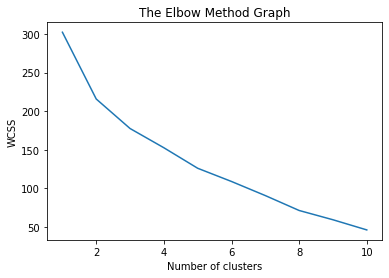

In [72]:
X_1 = cities_large[['foborn', 'anpopgrowth', 'share500',
       'povrate', 'masstransit', 'higher_educ', 'fo_tourists', 'dom_tourists',
       'inf_mortality', 'life_exp_m', 'life_exp_f', 'physicians',
       'anti_smoking', 'air_quality', 'retrofitted_city_vehic', 'bike_share',
       'Wholesale', 'Real Estate & Rental & Leasing', 'Wholesale/Retail Trade',
       'Business Services', 'Professional Services', 'Manufacturing',
       'Services', 'Financial Operations', 'Finance, Rental & Leasing',
       'Research and Advising', 'Trading and Logistics/Finances',
       'Finance and Insurance', 'Wholesale & Retail',
       'Professional, Scientific and Technical Services']]
wcss=[]
#we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10, random_state=0 )
    #i above is between 1-10 numbers. init parameter is the random #initialization method  
    #we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
    #find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
    #the next parameter is n_init which is the number of times the #K_means algorithm will be run with
    #different initial centroid.
    kmeans.fit(X_1) 
    #kmeans algorithm fits to the X dataset
    wcss.append(kmeans.inertia_)
    #kmeans inertia_ attribute is:  Sum of squared distances of samples 
    #to their closest cluster center.
    #4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow curve flattens more significantly when the number of clusters is 5, so we take this number for the best one. The elbow method shows 

In [73]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
city_labels_1 = kmeans.fit_predict(X_1)

km_1 = pd.DataFrame([(i,j) for (i,j) in zip(cities_large.city, city_labels_1)], columns=['city', 'labels'])
km_1

,city,labels
0,New York,2
1,London,2
2,Beijing,3
3,Boston,4
4,Los Angeles,2
5,Shanghai,3
6,Paris,2
7,Berlin,1
8,Stockholm,2
9,Toronto,2


In [74]:
print(city_labels_1)
km_1.groupby(['labels','city'])['labels'].count()

[2 2 3 4 2 3 2 1 2 2 2 4 4 1 2 2 2 1 0]


labels  city       
0       Dublin         1
1       Barcelona      1
        Berlin         1
        Geneva         1
2       Hong Kong      1
        London         1
        Los Angeles    1
        New York       1
        Paris          1
        Singapore      1
        Stockholm      1
        Sydney         1
        Toronto        1
        Vancouver      1
3       Beijing        1
        Shanghai       1
4       Amsterdam      1
        Boston         1
        Chicago        1
Name: labels, dtype: int64

Apparently there is some regionally-based clustering.

<b> Clustering with only innovation/startup indicators data:</b>

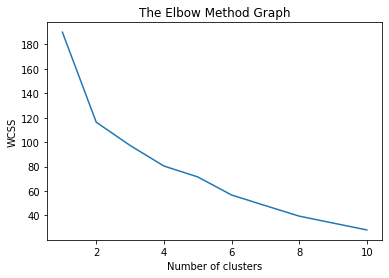

In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_2 = cities_large[['ranking', 'change', 'performance', 'funding', 'marketReach',
       'connectedness', 'talent', 'experience', 'k0wledge', 'growthIndex']]

wcss=[]
#we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    #i above is between 1-10 numbers. init parameter is the random #initialization method  
    #we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
    #find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
    #the next parameter is n_init which is the number of times the #K_means algorithm will be run with
    #different initial centroid.
    kmeans.fit(X_2) 
    #kmeans algorithm fits to the X dataset
    wcss.append(kmeans.inertia_)
    #kmeans inertia_ attribute is:  Sum of squared distances of samples 
    #to their closest cluster center.
    #4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### We see that the results are quite different. The curve becomes less steep at a later point with clusters increase and the WCSS is geneally lower which is expected given the lower number of features. <br/>
####We would chose a number of clusters of 4.

In [76]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
city_labels_2 = kmeans.fit_predict(X_2)

km_2 = pd.DataFrame([(i,j) for (i,j) in zip(cities_large.city, city_labels_2)], columns=['city', 'labels_2'])
km_2

,city,labels_2
0,New York,1
1,London,1
2,Beijing,1
3,Boston,1
4,Los Angeles,1
5,Shanghai,1
6,Paris,2
7,Berlin,2
8,Stockholm,2
9,Toronto,2


In [77]:
print(city_labels_2)
km_2.groupby(['labels_2','city'])['labels_2'].count()

[1 1 1 1 1 1 2 2 2 2 2 2 0 2 3 3 3 0 0]


labels_2  city       
0         Barcelona      1
          Chicago        1
          Dublin         1
1         Beijing        1
          Boston         1
          London         1
          Los Angeles    1
          New York       1
          Shanghai       1
2         Amsterdam      1
          Berlin         1
          Geneva         1
          Paris          1
          Singapore      1
          Stockholm      1
          Toronto        1
3         Hong Kong      1
          Sydney         1
          Vancouver      1
Name: labels_2, dtype: int64

#### Let`s combine these two datasets and run k-means

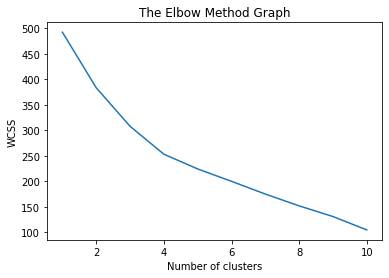

In [78]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_3 = cities_large[['foborn', 'anpopgrowth', 'share500',
       'povrate', 'masstransit', 'higher_educ', 'fo_tourists', 'dom_tourists',
       'inf_mortality', 'life_exp_m', 'life_exp_f', 'physicians',
       'anti_smoking', 'air_quality', 'retrofitted_city_vehic', 'bike_share',
       'Wholesale', 'Real Estate & Rental & Leasing', 'Wholesale/Retail Trade',
       'Business Services', 'Professional Services', 'Manufacturing',
       'Services', 'Financial Operations', 'Finance, Rental & Leasing',
       'Research and Advising', 'Trading and Logistics/Finances',
       'Finance and Insurance', 'Wholesale & Retail',
       'Professional, Scientific and Technical Services','ranking','change','performance','funding','marketReach','connectedness','talent','experience','k0wledge',
 'growthIndex']]

wcss=[]
#we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X_3) 
    wcss.append(kmeans.inertia_)

    #4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

There is some inflection at 4 clusters, so we take that number.

In [79]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
city_labels_3 = kmeans.fit_predict(X_3)

km_3 = pd.DataFrame([(i,j) for (i,j) in zip(cities_large.city, city_labels_3)], columns=['city', 'labels_3'])
km_3

,city,labels_3
0,New York,0
1,London,0
2,Beijing,2
3,Boston,0
4,Los Angeles,0
5,Shanghai,2
6,Paris,0
7,Berlin,1
8,Stockholm,0
9,Toronto,0


In [80]:
print(city_labels_3)
km_3.groupby(['labels_3','city'])['labels_3'].count()

[0 0 2 0 0 2 0 1 0 0 1 3 3 3 3 1 1 3 3]


labels_3  city       
0         Boston         1
          London         1
          Los Angeles    1
          New York       1
          Paris          1
          Stockholm      1
          Toronto        1
1         Berlin         1
          Hong Kong      1
          Singapore      1
          Vancouver      1
2         Beijing        1
          Shanghai       1
3         Amsterdam      1
          Barcelona      1
          Chicago        1
          Dublin         1
          Geneva         1
          Sydney         1
Name: labels_3, dtype: int64

The clustering here is even harder to decipher.

#

#### Now we try k-means with summarized data from Foursquare:

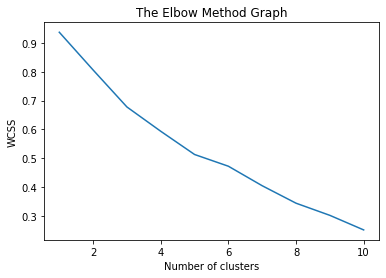

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_4 = cities_grouped.iloc[:,1:]

wcss=[]
#we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X_4) 
    wcss.append(kmeans.inertia_)

    #4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The is some inflection at 5 clusters, so we take that number.

In [83]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
city_labels_4 = kmeans.fit_predict(X_4)

km_4 = pd.DataFrame([(i,j) for (i,j) in zip(cities_large.city, city_labels_4)], columns=['city', 'labels_4'])
km_4

,city,labels_4
0,New York,1
1,London,1
2,Beijing,3
3,Boston,1
4,Los Angeles,1
5,Shanghai,2
6,Paris,1
7,Berlin,1
8,Stockholm,1
9,Toronto,1


In [84]:
print(city_labels_4)
km_4.groupby(['labels_4','city'])['labels_4'].count()

[1 1 3 1 1 2 1 1 1 1 1 3 1 0 0 1 4 1 1]


labels_4  city       
0         Geneva         1
          Sydney         1
1         Barcelona      1
          Berlin         1
          Boston         1
          Chicago        1
          Dublin         1
          London         1
          Los Angeles    1
          New York       1
          Paris          1
          Singapore      1
          Stockholm      1
          Toronto        1
          Vancouver      1
2         Shanghai       1
3         Amsterdam      1
          Beijing        1
4         Hong Kong      1
Name: labels_4, dtype: int64

It is now easy to draw significant conclusions from these results. Beijing and Shanghai seem to get often in the same group.

We will include also the (normalized) number of venues to if it makes any difference

In [85]:
four_x = pd.concat([cities_grouped.iloc[:,1:], combined['Venue Category']], axis=1)
transformers = [("num", StandardScaler(), four_x.columns)]
transformer = ColumnTransformer(transformers = transformers)
four_x_tra = transformer.fit_transform(four_x)
four_x_tra = pd.DataFrame(four_x_tra, columns = four_x.columns)
four_x_tra.head()

,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,...,Seafood Restaurant,Shanghai Restaurant,Shawarma Place,Shoe Store,Shopping Mall,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Venue Category
0,-0.235702,-0.396133,-0.235702,-0.235702,-0.235702,-0.417116,-0.342934,-0.423034,-0.472501,-0.235702,-0.235702,-0.378035,2.838840,0.231772,-0.491158,0.828755,-0.235702,-0.342753,-0.439217,-0.235702,-0.235702,2.096723,-0.235702,-0.235702,-0.235702,-0.342784,-0.235702,-0.414796,-0.235702,-0.796693,-0.235702,-0.235702,-0.337794,-0.235702,-0.235702,0.354869,-0.235702,-0.289329,-0.395500,4.242641,...,0.484878,-0.235702,-0.235702,-0.342784,-0.376087,3.289576,1.502958,-0.294769,-0.235702,-0.235702,4.242641,-0.429642,-0.235702,2.989168,-0.590644,-0.235702,-0.235702,-0.235702,-0.428495,-0.235702,-0.495951,4.242641,-0.235702,-0.402939,-0.330731,-0.324006,-0.235702,-0.235702,-0.30412,-0.235702,-0.316716,-0.405234,-0.235702,-0.551943,-0.342784,-0.421613,-0.235702,-0.235702,-0.235702,-0.936572
1,4.242641,1.190419,-0.235702,-0.235702,-0.235702,0.403477,-0.342934,-0.423034,-0.472501,-0.235702,-0.235702,-0.378035,-0.342894,1.478383,-0.491158,-0.752697,-0.235702,-0.342753,0.853225,-0.235702,-0.235702,-0.548345,-0.235702,-0.235702,-0.235702,-0.342784,-0.235702,-0.414796,-0.235702,1.427431,-0.235702,-0.235702,-0.337794,-0.235702,4.242641,0.022142,-0.235702,-0.289329,-0.395500,-0.235702,...,-0.489820,-0.235702,-0.235702,-0.342784,-0.376087,2.190741,-0.410882,4.081523,-0.235702,-0.235702,-0.235702,-0.429642,-0.235702,-0.406767,0.867977,-0.235702,-0.235702,-0.235702,-0.428495,-0.235702,-0.495951,-0.235702,-0.235702,-0.402939,-0.330731,3.765417,-0.235702,-0.235702,-0.30412,-0.235702,-0.316716,-0.405234,-0.235702,-0.551943,-0.342784,2.847218,-0.235702,-0.235702,-0.235702,1.718787
2,-0.235702,-0.396133,-0.235702,-0.235702,-0.235702,-0.417116,-0.342934,-0.423034,-0.472501,-0.235702,-0.235702,-0.378035,-0.342894,-0.894972,-0.491158,-0.752697,-0.235702,-0.342753,-0.439217,-0.235702,-0.235702,-0.548345,-0.235702,-0.235702,-0.235702,-0.342784,-0.235702,-0.414796,-0.235702,-0.796693,-0.235702,-0.235702,2.336407,-0.235702,-0.235702,-0.762144,-0.235702,-0.289329,2.889737,-0.235702,...,-0.489820,-0.235702,-0.235702,-0.342784,3.182968,-0.399371,-0.410882,-0.294769,-0.235702,-0.235702,-0.235702,-0.429642,-0.235702,-0.406767,-0.590644,-0.235702,-0.235702,-0.235702,-0.428495,-0.235702,-0.495951,-0.235702,-0.235702,1.234021,-0.330731,-0.324006,-0.235702,-0.235702,-0.30412,-0.235702,-0.316716,-0.405234,-0.235702,-0.551943,-0.342784,-0.421613,-0.235702,-0.235702,-0.235702,-0.619514
3,-0.235702,-0.396133,-0.235702,-0.235702,-0.235702,-0.417116,-0.342934,-0.423034,-0.472501,4.242641,-0.235702,1.100215,-0.342894,1.859291,-0.491158,0.213746,-0.235702,3.029691,-0.439217,-0.235702,-0.235702,-0.548345,-0.235702,-0.235702,-0.235702,-0.342784,-0.235702,3.207459,-0.235702,1.784390,-0.235702,-0.235702,-0.337794,4.242641,-0.235702,0.148015,-0.235702,-0.289329,-0.395500,-0.235702,...,-0.489820,-0.235702,4.242641,-0.342784,-0.376087,-0.399371,-0.410882,-0.294769,-0.235702,-0.235702,-0.235702,-0.429642,-0.235702,0.9767

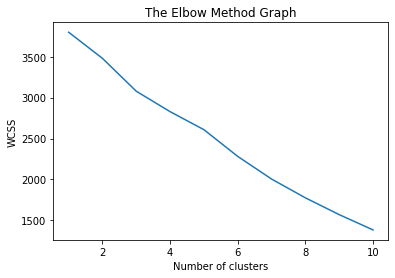

In [86]:
X_5 = four_x_tra.values

wcss=[]
#we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X_5) 
    wcss.append(kmeans.inertia_)

    #4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We get a significantly higher numbor for WCSS so this route is apparently not a good one.

'Zoo'

In [98]:
four_x = cities_grouped.iloc[:,1:]
transformers = [("num", StandardScaler(), four_x.columns)]
transformer = ColumnTransformer(transformers = transformers)
four_x_tra = transformer.fit_transform(four_x)
four_x_tra = pd.DataFrame(four_x_tra, columns = four_x.columns)
four_x_tra.head()

,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,...,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Shawarma Place,Shoe Store,Shopping Mall,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,-0.235702,-0.396133,-0.235702,-0.235702,-0.235702,-0.417116,-0.342934,-0.423034,-0.472501,-0.235702,-0.235702,-0.378035,2.838840,0.231772,-0.491158,0.828755,-0.235702,-0.342753,-0.439217,-0.235702,-0.235702,2.096723,-0.235702,-0.235702,-0.235702,-0.342784,-0.235702,-0.414796,-0.235702,-0.796693,-0.235702,-0.235702,-0.337794,-0.235702,-0.235702,0.354869,-0.235702,-0.289329,-0.395500,4.242641,...,1.594899,0.484878,-0.235702,-0.235702,-0.342784,-0.376087,3.289576,1.502958,-0.294769,-0.235702,-0.235702,4.242641,-0.429642,-0.235702,2.989168,-0.590644,-0.235702,-0.235702,-0.235702,-0.428495,-0.235702,-0.495951,4.242641,-0.235702,-0.402939,-0.330731,-0.324006,-0.235702,-0.235702,-0.30412,-0.235702,-0.316716,-0.405234,-0.235702,-0.551943,-0.342784,-0.421613,-0.235702,-0.235702,-0.235702
1,4.242641,1.190419,-0.235702,-0.235702,-0.235702,0.403477,-0.342934,-0.423034,-0.472501,-0.235702,-0.235702,-0.378035,-0.342894,1.478383,-0.491158,-0.752697,-0.235702,-0.342753,0.853225,-0.235702,-0.235702,-0.548345,-0.235702,-0.235702,-0.235702,-0.342784,-0.235702,-0.414796,-0.235702,1.427431,-0.235702,-0.235702,-0.337794,-0.235702,4.242641,0.022142,-0.235702,-0.289329,-0.395500,-0.235702,...,-0.319510,-0.489820,-0.235702,-0.235702,-0.342784,-0.376087,2.190741,-0.410882,4.081523,-0.235702,-0.235702,-0.235702,-0.429642,-0.235702,-0.406767,0.867977,-0.235702,-0.235702,-0.235702,-0.428495,-0.235702,-0.495951,-0.235702,-0.235702,-0.402939,-0.330731,3.765417,-0.235702,-0.235702,-0.30412,-0.235702,-0.316716,-0.405234,-0.235702,-0.551943,-0.342784,2.847218,-0.235702,-0.235702,-0.235702
2,-0.235702,-0.396133,-0.235702,-0.235702,-0.235702,-0.417116,-0.342934,-0.423034,-0.472501,-0.235702,-0.235702,-0.378035,-0.342894,-0.894972,-0.491158,-0.752697,-0.235702,-0.342753,-0.439217,-0.235702,-0.235702,-0.548345,-0.235702,-0.235702,-0.235702,-0.342784,-0.235702,-0.414796,-0.235702,-0.796693,-0.235702,-0.235702,2.336407,-0.235702,-0.235702,-0.762144,-0.235702,-0.289329,2.889737,-0.235702,...,-0.319510,-0.489820,-0.235702,-0.235702,-0.342784,3.182968,-0.399371,-0.410882,-0.294769,-0.235702,-0.235702,-0.235702,-0.429642,-0.235702,-0.406767,-0.590644,-0.235702,-0.235702,-0.235702,-0.428495,-0.235702,-0.495951,-0.235702,-0.235702,1.234021,-0.330731,-0.324006,-0.235702,-0.235702,-0.30412,-0.235702,-0.316716,-0.405234,-0.235702,-0.551943,-0.342784,-0.421613,-0.235702,-0.235702,-0.235702
3,-0.235702,-0.396133,-0.235702,-0.235702,-0.235702,-0.417116,-0.342934,-0.423034,-0.472501,4.242641,-0.235702,1.100215,-0.342894,1.859291,-0.491158,0.213746,-0.235702,3.029691,-0.439217,-0.235702,-0.235702,-0.548345,-0.235702,-0.235702,-0.235702,-0.342784,-0.235702,3.207459,-0.235702,1.784390,-0.235702,-0.235702,-0.337794,4.242641,-0.235702,0.148015,-0.235702,-0.289329,-0.395500,-0.235702,...,-0.319510,-0.489820,-0.235702,4.242641,-0.342784,-0.376087,-0.399371,-0.410882,-0.294769,-0.235702,-0.235702,-0.235702,-0.4296

Finally let`s see what a clustering with all features combined may show.

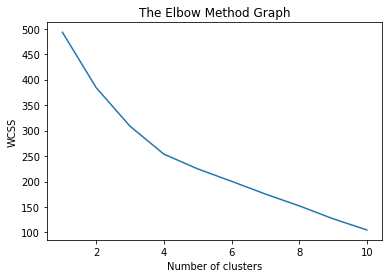

In [99]:
X_6 = pd.concat([pd.DataFrame(X_3), four_x], axis=1)
wcss=[]
#we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X_6) 
    wcss.append(kmeans.inertia_)

    #4.Plot the elbow graph
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [88]:
X_6.head()

,foborn,anpopgrowth,share500,povrate,masstransit,higher_educ,fo_tourists,dom_tourists,inf_mortality,life_exp_m,life_exp_f,physicians,anti_smoking,air_quality,retrofitted_city_vehic,bike_share,Wholesale,Real Estate & Rental & Leasing,Wholesale/Retail Trade,Business Services,Professional Services,Manufacturing,Services,Financial Operations,"Finance, Rental & Leasing",Research and Advising,Trading and Logistics/Finances,Finance and Insurance,Wholesale & Retail,"Professional, Scientific and Technical Services",ranking,change,performance,funding,marketReach,connectedness,talent,experience,k0wledge,growthIndex,...,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Shawarma Place,Shoe Store,Shopping Mall,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0.758267,-0.326949,0.938636,0.846124,0.277624,0.520442,0.496584,0.297078,0.112506,-0.025036,0.004595,1.639946,0.0,-0.463117,0.763763,0.516398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.468958,0.051510,-1.215838,-1.201789,0.035007,-0.624695,-0.805313,-1.600781,-0.735215,-0.042640,...,0.030303,0.030303,0.0,0.000000,0.0,0.000000,0.030303,0.030303,0.00000,0.0,0.000000,0.030303,0.0,0.0,0.060606,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.030303,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.824363,-0.426853,0.745371,0.296410,-0.215090,0.247258,1.247178,-0.352879,0.059682,0.354936,0.004595,-0.007475,0.0,-0.153012,0.763763,0.516398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.345461,0.051510,-1.215838,-1.201789,-1.295259,-1.366520,-0.805313,-0.858956,-1.433669,-0.042640,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.021277,0.000000,0.06383,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.021277,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.021277,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.021277,0.0,0.0,0.0
2,-1.590793,1.537924,3.161185,-2.154668,3.316260,-2.884245,-0.433501,3.406630,-0.632307,0.354936,-0.131548,1.198841,0.0,3.413191,-1.309307,-1.936492,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.221965,0.377742,-1.215838,-1.201789,1.365273,1.600781,-1.533930,-1.600781,-1.433669,-1.662966,...,0.000000,0.000000,0.0,0.000000,0.0,0.071429,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.035714,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.163401,-0.326949,-0.704118,0.441922,-0.513010,-0.410408,-1.047031,-0.195732,0.693566,-1.418267,-0.993784,-0.011698,0.0,-0.618169,0.763763,-1.936492,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.098468,0.051510,-1.215838,-0.509850,-0.630126,0.117130,-1.533930,-1.600781,-0.735215,0.767523,...,0.000000,0.000000,0.0,0.012346,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.024691,0.000000,0.0,0.0,0.0,0.0,0.012346,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.012346,0.024691,0.0,0.0,0.012346,0.0,0.012346,0.0,0.0,0.0
4,0.427786,-0.426853,0.745371,0.296410,-0.215090,1.360231,1.247178,-0.352879,0.059682,0.354936,0.004595,-0.007966,0.0,-0.385591,0.763763,0.516398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.851476,1.030204,-1.215838,-1.201789,0.035007,0.858956,-0.076696,-0.858956,-0.036761,-0.852803,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.054054,0.000000,0.0,0.0,0.000000,0.027027,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.027027,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0

In [89]:
X_3.head()

,foborn,anpopgrowth,share500,povrate,masstransit,higher_educ,fo_tourists,dom_tourists,inf_mortality,life_exp_m,life_exp_f,physicians,anti_smoking,air_quality,retrofitted_city_vehic,bike_share,Wholesale,Real Estate & Rental & Leasing,Wholesale/Retail Trade,Business Services,Professional Services,Manufacturing,Services,Financial Operations,"Finance, Rental & Leasing",Research and Advising,Trading and Logistics/Finances,Finance and Insurance,Wholesale & Retail,"Professional, Scientific and Technical Services",ranking,change,performance,funding,marketReach,connectedness,talent,experience,k0wledge,growthIndex
0,0.758267,-0.326949,0.938636,0.846124,0.277624,0.520442,0.496584,0.297078,0.112506,-0.025036,0.004595,1.639946,0.0,-0.463117,0.763763,0.516398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.468958,0.051510,-1.215838,-1.201789,0.035007,-0.624695,-0.805313,-1.600781,-0.735215,-0.042640
1,0.824363,-0.426853,0.745371,0.296410,-0.215090,0.247258,1.247178,-0.352879,0.059682,0.354936,0.004595,-0.007475,0.0,-0.153012,0.763763,0.516398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.345461,0.051510,-1.215838,-1.201789,-1.295259,-1.366520,-0.805313,-0.858956,-1.433669,-0.042640
2,-1.590793,1.537924,3.161185,-2.154668,3.316260,-2.884245,-0.433501,3.406630,-0.632307,0.354936,-0.131548,1.198841,0.0,3.413191,-1.309307,-1.936492,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.221965,0.377742,-1.215838,-1.201789,1.365273,1.600781,-1.533930,-1.600781,-1.433669,-1.662966
3,0.163401,-0.326949,-0.704118,0.441922,-0.513010,-0.410408,-1.047031,-0.195732,0.693566,-1.418267,-0.993784,-0.011698,0.0,-0.618169,0.763763,-1.936492,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.098468,0.051510,-1.215838,-0.509850,-0.630126,0.117130,-1.533930,-1.600781,-0.735215,0.767523
4,0.427786,-0.426853,0.745371,0.296410,-0.215090,1.360231,1.247178,-0.352879,0.059682,0.354936,0.004595,-0.007966,0.0,-0.385591,0.763763,0.516398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.851476,1.030204,-1.215838,-1.201789,0.035007,0.858956,-0.076696,-0.858956,-0.036761,-0.852803


In [90]:
X_4.head()

,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Bistro,Board Shop,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,...,Scandinavian Restaurant,Seafood Restaurant,Shanghai Restaurant,Shawarma Place,Shoe Store,Shopping Mall,Snack Place,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.030303,0.030303,0.000000,0.060606,0.0,0.000000,0.000000,0.0,0.0,0.030303,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.060606,0.0,0.0,0.000000,0.030303,...,0.030303,0.030303,0.0,0.000000,0.0,0.000000,0.030303,0.030303,0.00000,0.0,0.000000,0.030303,0.0,0.0,0.060606,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.030303,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.021277,0.021277,0.0,0.0,0.0,0.021277,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.063830,0.000000,0.000000,0.0,0.000000,0.021277,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.042553,0.0,0.0,0.000000,0.000000,0.021277,0.042553,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.021277,0.000000,0.06383,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.021277,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.021277,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.021277,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.035714,0.000000,0.000000,0.000000,0.0,0.0,0.035714,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.071429,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.035714,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.012346,0.0,0.012346,0.000000,0.074074,0.000000,0.037037,0.0,0.012346,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.024691,0.0,0.049383,0.0,0.0,0.000000,0.012346,0.000000,0.049383,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.012346,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.024691,0.000000,0.0,0.0,0.0,0.0,0.012346,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.012346,0.024691,0.0,0.0,0.012346,0.0,0.012346,0.0,0.0,0.0
4,0.000000,0.027027,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.027027,0.054054,0.054054,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.027027,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.054054,0.000000,0.0,0.0,0.000000,0.027027,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.027027,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


It does not look bad especially with the high number of features, without standardizing, so we will keep it. There is some inflection at 4 clusters, so we take that number.

In [100]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
city_labels_6 = kmeans.fit_predict(X_6)

km_6 = pd.DataFrame([(i,j) for (i,j) in zip(cities_large.city, city_labels_6)], columns=['city', 'labels_6'])
km_6

,city,labels_6
0,New York,0
1,London,0
2,Beijing,2
3,Boston,0
4,Los Angeles,0
5,Shanghai,2
6,Paris,0
7,Berlin,1
8,Stockholm,0
9,Toronto,0


In [101]:
print(city_labels_6)
km_6.groupby(['labels_6','city'])['labels_6'].count()

[0 0 2 0 0 2 0 1 0 0 1 3 3 3 3 1 1 3 3]


labels_6  city       
0         Boston         1
          London         1
          Los Angeles    1
          New York       1
          Paris          1
          Stockholm      1
          Toronto        1
1         Berlin         1
          Hong Kong      1
          Singapore      1
          Vancouver      1
2         Beijing        1
          Shanghai       1
3         Amsterdam      1
          Barcelona      1
          Chicago        1
          Dublin         1
          Geneva         1
          Sydney         1
Name: labels_6, dtype: int64

It is not easy to draw significant conclusions from these results. Beijing and Shanghai seem to get often in the same group. 

In the end, the fact that we get different groups of clusters may only indicate that these clusters may be good for different purposes.

Let`s try a combined table of labels:

In [102]:
fin_res = pd.DataFrame(zip(cities_large.city, city_labels_1,city_labels_2,city_labels_3, city_labels_4,city_labels_6), columns=['city','try_1','try_2','try_3','try_4','try_6'])
fin_res

,city,try_1,try_2,try_3,try_4,try_6
0,New York,2,1,0,1,0
1,London,2,1,0,1,0
2,Beijing,3,1,2,3,2
3,Boston,4,1,0,1,0
4,Los Angeles,2,1,0,1,0
5,Shanghai,3,1,2,2,2
6,Paris,2,2,0,1,0
7,Berlin,1,2,1,1,1
8,Stockholm,2,2,0,1,0
9,Toronto,2,2,0,1,0


###Now let`s visualize the different clusters:

In [56]:
# We just need 3 columns
citimap = citimap.iloc[:,1:]
citimap.columns = ['city', 'Latitude', 'Longitude']
citimap.head()

,city,Latitude,Longitude
0,New York,40.840573,-73.919379
1,London,51.516689,-0.124093
2,Beijing,39.938734,116.426407
3,Boston,42.337555,-71.050128
4,Los Angeles,34.072787,-118.281653


#### 1st Clustering

In [59]:
latitude = 40.442900 	
longitude = -73.592500
map_cities = folium.Map(location=[latitude, longitude], zoom_start=1)

kclusters = (fin_res.iloc[:,1]).max()+1
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_large.Latitude, cities_large.Longitude, cities_large.city, fin_res.iloc[:,1]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cities)
map_cities

####2nd Clustering

In [60]:
latitude = 40.442900 	
longitude = -73.592500
map_cities = folium.Map(location=[latitude, longitude], zoom_start=1)

kclusters = (fin_res.iloc[:,2]).max()+1
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_large.Latitude, cities_large.Longitude, cities_large.city, fin_res.iloc[:,2]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cities)
map_cities

####3rd Clustering

In [61]:
latitude = 40.442900 	
longitude = -73.592500
map_cities = folium.Map(location=[latitude, longitude], zoom_start=1)

kclusters = (fin_res.iloc[:,3]).max()+1
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_large.Latitude, cities_large.Longitude, cities_large.city, 
                                  fin_res.iloc[:,3]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cities)
map_cities

####4the Clustering

In [62]:
latitude = 40.442900 	
longitude = -73.592500
map_cities = folium.Map(location=[latitude, longitude], zoom_start=1)

kclusters = (fin_res.iloc[:,4]).max()+1
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_large.Latitude, cities_large.Longitude, cities_large.city, 
                                  fin_res.iloc[:,4]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cities)
map_cities

####6th Clustering

In [103]:
latitude = 40.442900 	
longitude = -73.592500
map_cities = folium.Map(location=[latitude, longitude], zoom_start=1)

kclusters = (fin_res.iloc[:,5]).max()+1
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cities_large.Latitude, cities_large.Longitude, cities_large.city, 
                                  fin_res.iloc[:,5]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_cities)
map_cities

### We may try to check how similar are the different clustering produced. We may use different measures. We chose correlation here.

[Text(0.5, 0, 'try_1'),
 Text(1.5, 0, 'try_2'),
 Text(2.5, 0, 'try_3'),
 Text(3.5, 0, 'try_4'),
 Text(4.5, 0, 'try_6')]

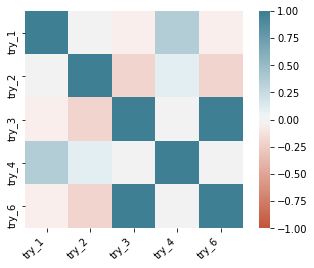

In [94]:
import seaborn as sns
corr = fin_res.iloc[:,1:].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [95]:
corr

,try_1,try_2,try_3,try_4,try_6
try_1,1.000000,-0.031235,-0.044231,0.365842,-0.044231
try_2,-0.031235,1.000000,-0.207593,0.105822,-0.207593
try_3,-0.044231,-0.207593,1.000000,0.033639,1.000000
try_4,0.365842,0.105822,0.033639,1.000000,0.033639
try_6,-0.044231,-0.207593,1.000000,0.033639,1.000000


Apparently, there is a perfect correlation between try_3 (complete 1st set of features and try_6 (combination between try_3 and Foursquare data) which suggest that thefeatures somehow overwhelm the features with Foursquare. This is supported by the fact that Forsquare features (try_4) have low correlation  with any other group. There may be need to further refine the methodology but would require further and more detailed investigation.

Clear conclusions are hard to draw from these results apart from the fact that East-Asian/Australian clusters rarely overlap with other clusters.

Additionally, this may be used to identify sets of features with low mutual correlation for other purposes.


In [64]:
fin_res

,city,try_1,try_2,try_3,try_4,try_6
0,New York,2,1,0,1,0
1,London,2,1,0,1,0
2,Beijing,3,1,2,3,2
3,Boston,4,1,0,1,0
4,Los Angeles,2,1,0,1,0
5,Shanghai,3,1,2,2,2
6,Paris,2,2,0,1,0
7,Berlin,1,2,1,1,1
8,Stockholm,2,2,0,1,0
9,Toronto,2,2,0,1,0
